In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

In [3]:
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.utils import to_categorical

In [4]:
from tensorflow.keras.datasets import cifar10

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

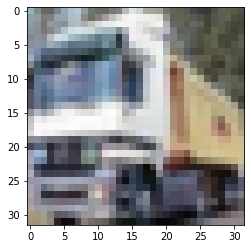

In [10]:
plt.imshow(x_train[1])

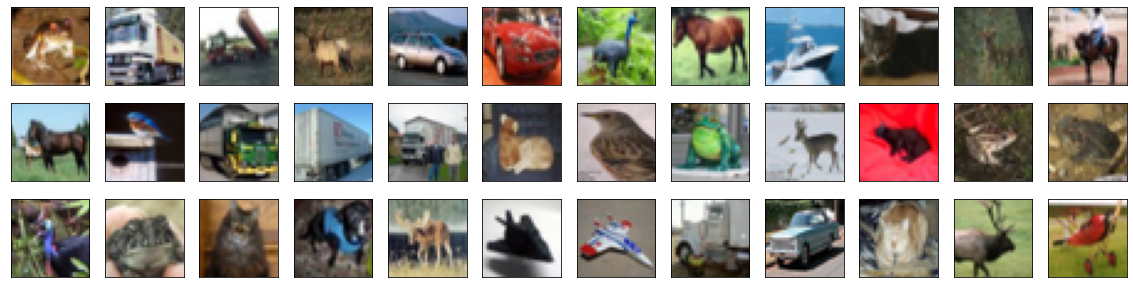

In [11]:
fig = plt.figure(figsize=(20,5))

for i in range(36):
    ax = fig.add_subplot(3,12, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i])

In [12]:
#  multiclassification nural network model 을 생성하고 테스트 평가

In [ ]:
# input data shape = (데이터수, row num, col num, depth)

In [18]:
x_train_vec = x_train.reshape(50000, 32, 32, 3) 
x_test_vec = x_test.reshape(10000, 32, 32, 3)

In [19]:
y_train_oh = utils.to_categorical(y_train)
y_test_oh = utils.to_categorical(y_test)

In [31]:
# 스케일링
x_train = x_train/255
x_test = x_test/255

In [32]:
model = Sequential()
model.add(Conv2D(16, kernel_size=4, padding='same',input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32, kernel_size=4, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        784       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          32832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 64)        

In [34]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [35]:
hist = model.fit(x_train_cov, y_train_oh, epochs=10, batch_size=20, validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 11s 5ms/step - loss: 1.7007 - accuracy: 0.4238 - val_loss: 1.4826 - val_accuracy: 0.4546
Epoch 2/10
2000/2000 [==============================] - 10s 5ms/step - loss: 1.3219 - accuracy: 0.5299 - val_loss: 1.2746 - val_accuracy: 0.5467
Epoch 3/10
2000/2000 [==============================] - 10s 5ms/step - loss: 1.1863 - accuracy: 0.5822 - val_loss: 1.1872 - val_accuracy: 0.5822
Epoch 4/10
2000/2000 [==============================] - 10s 5ms/step - loss: 1.0972 - accuracy: 0.6151 - val_loss: 1.1427 - val_accuracy: 0.6039
Epoch 5/10
2000/2000 [==============================] - 10s 5ms/step - loss: 1.0207 - accuracy: 0.6454 - val_loss: 1.1474 - val_accuracy: 0.6124
Epoch 6/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.9456 - accuracy: 0.6702 - val_loss: 1.1792 - val_accuracy: 0.6097
Epoch 7/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.8893 - accuracy: 0.6916 - val_loss: 1.1592 - val_ac

In [36]:
model.evaluate(x_test_vec, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 1.1352 - accuracy: 0.6353


[1.1352137327194214, 0.6352999806404114]

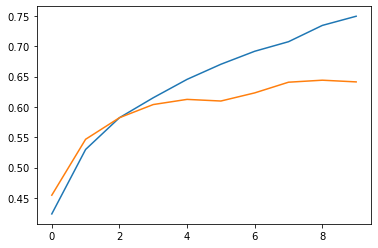

In [37]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [85]:
from tensorflow.keras.applications import vgg16

In [86]:
vgg_model = vgg16.VGG16(weights='imagenet')

In [87]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

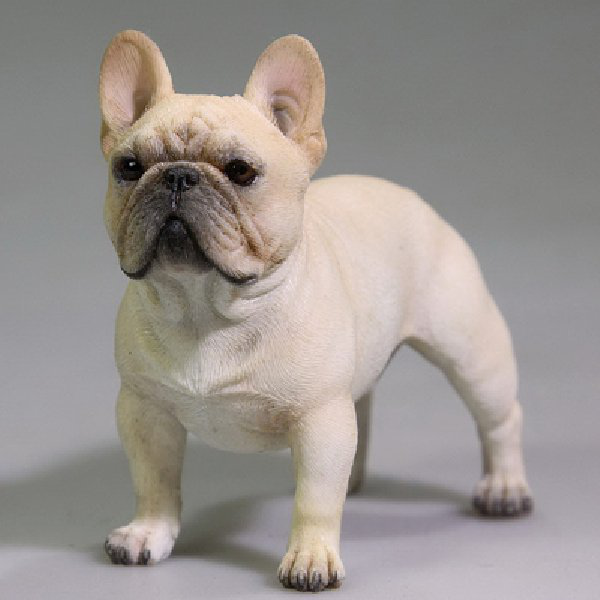

In [88]:
load_img('dog.jpg')

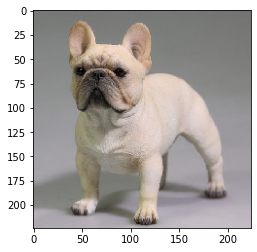

In [89]:
file_name = 'dog.jpg'

org = load_img(file_name, target_size=(224,224))
img = img_to_array(org)
plt.imshow(np.uint8(img))

In [90]:
img.shape

(224, 224, 3)

In [91]:
x = np.expand_dims(img, axis=0)
x.shape

(1, 224, 224, 3)

In [92]:
x = vgg16.preprocess_input(x)
pred = vgg_model.predict(x)
print(pred)

[[9.78559456e-10 4.18724055e-10 5.09295384e-10 1.94062572e-10
  3.28549327e-10 3.22625093e-10 2.08944147e-11 9.85054083e-09
  1.26552475e-08 2.30585030e-11 1.74574133e-10 1.98457098e-10
  3.11736637e-10 2.35271191e-10 2.86611207e-10 2.80823281e-10
  1.97085515e-10 4.19300461e-09 5.09563558e-10 3.17074256e-10
  4.01976785e-11 1.53176555e-10 9.48310267e-12 1.70407299e-09
  7.39693029e-10 1.19503546e-10 1.52651544e-10 3.35529313e-11
  1.97568781e-10 8.11227974e-10 8.38252845e-09 7.70132758e-09
  2.46495571e-08 4.48502968e-09 5.87429128e-09 3.12883475e-09
  8.91947849e-09 5.57284885e-09 4.47701903e-10 8.12006629e-10
  4.75058770e-10 1.11299289e-10 3.87640510e-11 1.16695598e-10
  1.60886582e-10 8.87889406e-09 1.00607556e-09 9.01390607e-08
  3.62434222e-10 1.31566272e-10 2.63946975e-10 1.53477131e-07
  1.11754939e-10 8.75406136e-11 4.42704678e-10 3.26560112e-10
  6.42663492e-11 7.13533746e-11 2.61462050e-11 3.48341425e-11
  5.95927696e-10 3.83242243e-10 1.58763988e-10 4.09275426e-11
  2.1588

In [93]:
from keras.applications.imagenet_utils import decode_predictions
label = decode_predictions(pred)
print(label)

[[('n02108915', 'French_bulldog', 0.99661654), ('n02110958', 'pug', 0.0024657028), ('n02112706', 'Brabancon_griffon', 0.00021777448), ('n02096585', 'Boston_bull', 0.00017717203), ('n03935335', 'piggy_bank', 9.825267e-05)]]
